## Inspect Satellite Images and Json files

This notebook help us to understand how is composed the information about the satellite images

Mount the gdriver

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/grapes_project/samples/uvas

/content/gdrive/MyDrive/grapes_project/samples/uvas


Import Libraries

In [3]:
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np
import json

In [4]:
def draw_points(cuartel_points, image):
    font = cv2.FONT_HERSHEY_SIMPLEX 
    # fontScale 
    fontScale = 0.5
      
    # Blue color in BGR 
    color = (255, 255, 255)

    for point in cuartel_points:
      image = cv2.putText(image, str(point), (point[0],point[1]), font, fontScale, color )

    return image

In [5]:
def draw_cuartel_ids(cuartel_points, image, cuartel_id):
  cent_x = sum([ arr[0] for arr in cuartel_points]) / len(cuartel_points)
  cent_y = sum([ arr[1] for arr in cuartel_points]) / len(cuartel_points)

  font = cv2.FONT_HERSHEY_SIMPLEX 
  # fontScale 
  fontScale = 1
      
  # Blue color in BGR 
  color = (255, 255, 255)

  image = cv2.putText(image, str(cuartel_id), (int(cent_x),int(cent_y)), font, fontScale, color )

Cuartel id: 2, cuartel_points: [(641, 38), (402, 38), (388, 613), (649, 610)]
Diagonal:  [(388, 613), (641, 38)]
Poly1 blue: [(641, 38), (402, 38), (388, 613)]
Poly2 green: [(641, 38), (649, 610), (388, 613)]
[(641, 38), (402, 38), (388, 613)]
[(641, 38), (649, 610), (388, 613)]
Cuartel id: 3, cuartel_points: [(908, 35), (662, 35), (672, 611), (932, 604)]
Diagonal:  [(672, 611), (908, 35)]
Poly1 blue: [(908, 35), (662, 35), (672, 611)]
Poly2 green: [(908, 35), (932, 604), (672, 611)]
[(908, 35), (662, 35), (672, 611)]
[(908, 35), (932, 604), (672, 611)]
Cuartel id: 4, cuartel_points: [(1134, 33), (928, 33), (960, 609), (1282, 594), (1266, 612)]
Diagonal:  [(960, 609), (1134, 33)]
Poly1 blue: [(1134, 33), (928, 33), (960, 609)]
Poly2 green: [(1134, 33), (1282, 594), (1266, 612), (960, 609)]
[(1134, 33), (928, 33), (960, 609)]
[(1134, 33), (1282, 594), (1266, 612), (960, 609)]


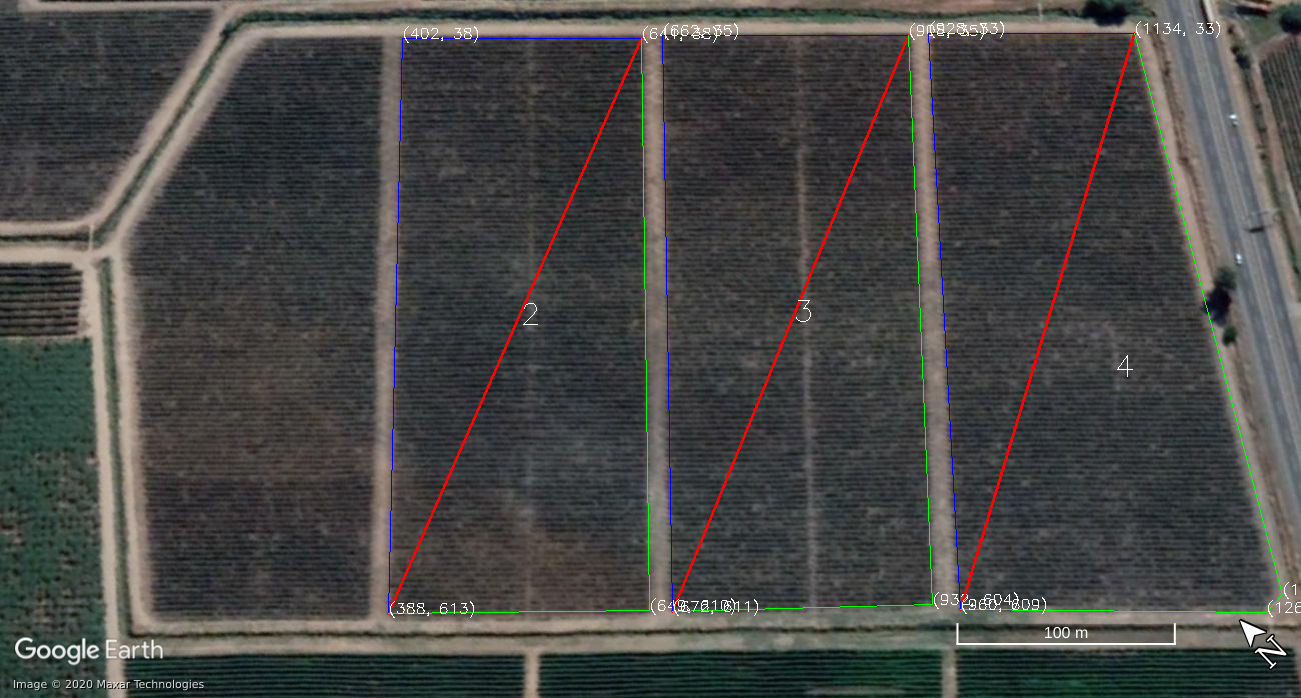

In [ ]:
#check satellite image that already known

COORDENADAS_POLY = {"2": {"2": {"poly_verts": [[(641, 38), (402, 38), (388, 613)], [(641, 38), (649, 610), (388, 613)]],
                                "diagonal": [(388, 613), (641, 38)], "hilera_angulo": 0, "n_hileras": 112}, "3": {"poly_verts": [[(908, 35), (662, 35), (672, 611)], [(908, 35), (932, 604), (672, 611)]],
                                                                                                                  "diagonal": [(672, 611), (908, 35)], "hilera_angulo": 0, "n_hileras": 112}, "4": {"poly_verts": [[(1134, 33), (928, 33), (960, 609)], [(1134, 33), (1282, 594), (1266, 612), (960, 609)]],
                                                                                                                                                                                                    "diagonal": [(960, 609), (1134, 33)], "hilera_angulo": 0, "n_hileras": 113}},
                    "3": {"1": {"poly_verts": [[(1192, 43), (450, 10), (437, 32), (374, 321), (360, 478), (402, 690)], [(1192, 43), (1183, 85), (1113, 161), (999, 125), (933, 211), (859, 352), (821, 612), (785, 638), (737, 652), (402, 690)]],
                                "diagonal": [(1192, 43), (402, 690)], "hilera_angulo": 20, "n_hileras": 259}}}

SAT_DIR = "stuff/satellite_images/"

sat_info = COORDENADAS_POLY

campos_ids = ['2']
sat_images_file = ["curicoMap.jpg"]

for idx, i in enumerate(campos_ids):
  img = cv2.imread(os.path.join(SAT_DIR, sat_images_file[idx]))
  
  for cuartel_id, info in sat_info[i].items():

    # draw the diagonal
    pt1, pt2 = info['diagonal']
    img = cv2.line(img, tuple(pt1), tuple(pt2), color = (0, 0, 255), thickness =  2)

    # draw the poly vertexs
    poly1, poly2 = info['poly_verts']

    #if (cuartel_id == '2'):
    image = cv2.polylines(img, [np.array(poly1)], isClosed = False, color = (255,0,0), thickness = 1)
    image = cv2.polylines(img, [np.array(poly2)], isClosed = False, color = (000,255,0), thickness = 1)

    #draw the cuartel points
    cuartel_points = [point for point in poly1]
    cuartel_points += [point for point in poly2 if not point in poly1 ]

    print("Cuartel id: {}, cuartel_points: {}".format(cuartel_id, cuartel_points))
    
    image = draw_points(cuartel_points, image)

    image = draw_cuartel_ids(cuartel_points, image, cuartel_id)

    print("Diagonal: ", info['diagonal'])
    print("Poly1 blue:", poly1)
    print("Poly2 green:",poly2)


    print(poly1)
    print(poly2)

  cv2_imshow(img)


Load json and draw the lines a diagonal on the images

In [6]:
JSON_PATH = "stuff/json/ConchayToro.json"
SAT_DIR = "stuff/satellite_images/"

f = open(JSON_PATH, 'rt')
sat_info = json.loads(f.read())

campos_ids = ['1', '2', '3']
sat_images_file = ["campo1.jpg", "campo2.jpg", "cytcuart6.jpg"]

for idx, i in enumerate(campos_ids):
  img = cv2.imread(os.path.join(SAT_DIR, sat_images_file[idx]))
  
  for cuartel_id, info in sat_info[i].items():

    # draw the diagonal
    pt1, pt2 = info['diagonal']
    img = cv2.line(img, tuple(pt1), tuple(pt2), color = (0, 0, 255), thickness =  2)

    # draw the poly vertexs
    poly1, poly2 = info['poly_verts']

    #if (cuartel_id == '2'):
    image = cv2.polylines(img, [np.array(poly1)], isClosed = False, color = (255,0,0), thickness = 1)
    image = cv2.polylines(img, [np.array(poly2)], isClosed = False, color = (000,255,0), thickness = 1)

    #draw the cuartel points
    cuartel_points = [point for point in poly1]
    cuartel_points += [point for point in poly2 if not point in poly1 ]

    print("Cuartel id: {}, cuartel_points: {}".format(cuartel_id, cuartel_points))
    
    image = draw_points(cuartel_points, image)

    image = draw_cuartel_ids(cuartel_points, image, cuartel_id)

    print("Diagonal: ", info['diagonal'])
    print("Poly1 blue:", poly1)
    print("Poly2 green:",poly2)

  cv2_imshow(img)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
a = [1,2]
tuple(a)

(1, 2)

In [ ]:
578 +18

596